<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2024-2/Laboratorios/Laboratorio_01_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




# Laboratorio 1.0:

## Series de tiempo

El siguiente [dataset](https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Pandas_data_historical_dataEURUSD.csv) contiene información del precio del eur/usd  desde el 05/07/2022/ hasta el 12/05/2023 con periodicidad de una hora. El data frame contiene el precio de apertura, cierrre, valor más bajo cotizado, valor más alto cotizado, volumen, spread etc. Para este dataset, realizar lo siguiente:


1. Leer el dataset desde el github.
2. Definir como indice la columna time.
3. Obtenga información del data frame.

4. Determine si hay null, nan en el data frame.

5. Emplea la notacion Pascal Case y trabaja solo con la columa del precio de cierre del eur/usd.  

6. Ahora vamos a determinar cual es la mejor distribución estadística que se ajusta a la diferencia del precio de cierre cada hora, para ello realizamos lo siguiente:
- Determine la diferencia de precio entre horas, agregue una nueva columna llamada DiffPrice, en este punto tu dataframe debe tener solo dos columnas Close, DiffPrice y el indice debe ser el tiempo.
- Para la nueva columna construya un histograma de los datos.
- Determine la mejor distribucion estadística que se ajusta al histograma anterior, para ello puede emplear lo siguente:


https://pypi.org/project/fitter/

```python


from fitter import Fitter, get_common_distributions, get_distributions

f = Fitter(data,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()
#Indentificamos la mejor distribucion con el error cuadratico medio
f.get_best(method = 'sumsquare_error')
#Indentificamos parametros de la distrubicion beta
f.fitted_param["beta"]

```

Con el metodo get_distributions(), podemos ver todas las distribuciones estadisticas de la libreria. Ajusta a la mejor.  Puede consultar [esta](https://medium.com/the-researchers-guide/finding-the-best-distribution-that-fits-your-data-using-pythons-fitter-library-319a5a0972e9)  página si desea ver un ejemplo.


7. Para el data frame, seleccionemos solo los datos del 2023.

8. El comando groupby permite agrupar los datos con la periodicidad deseada: 1 dias, 2 dias, 1 mes etc. Determina el promedio con una periodicidad de 15 dias, con periodidicidad de 1 semana, y una periodicidad de 1 mes

```python
  df.groupby(pd.Grouper(key='time', freq='15D')).mean()
```

9. Para los datos asociados a los meses de 2023, construya un histograma para cada mes.  Para ello puedo emplear el metodo groupby. Notetese que si no  realiza una operación después de aplicar el metodo grouby, podrias iterar sobre dicho objeto, por ejemplo:

```python
q=df.groupby(pd.Grouper(key='time', freq='15D'))

for name, group in q:
  print(name, group)
```


In [46]:
!pip install fitter

In [47]:
#Librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from fitter import Fitter, get_common_distributions, get_distributions

1. Leer el dataset desde el github.

In [48]:
df = pd.read_csv('https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Pandas_data_historical_dataEURUSD.csv')

In [49]:
df = df.drop(columns=['Unnamed: 0'])
df

,time,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen
0,2022-07-25 13:00:00,1.02427,1.02430,1.02145,1.02345,3927,8,0,1.023860,-0.00046,-0.00082,-0.000640
1,2022-07-25 14:00:00,1.02345,1.02578,1.02288,1.02299,5344,8,0,1.023220,-0.00046,-0.00082,-0.000640
2,2022-07-25 15:00:00,1.02303,1.02476,1.02230,1.02457,5524,8,0,1.023800,0.00158,-0.00042,0.000580
3,2022-07-25 16:00:00,1.02454,1.02548,1.02355,1.02485,5234,8,0,1.024695,0.00028,0.00151,0.000895
4,2022-07-25 17:00:00,1.02485,1.02514,1.02030,1.02181,9031,7,0,1.023330,-0.00304,0.00031,-0.001365
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2023-05-12 19:00:00,1.08552,1.08569,1.08485,1.08514,2275,8,0,1.085330,-0.00038,-0.00071,-0.000545
4996,2023-05-12 20:00:00,1.08516,1.08567,1.08502,1.08546,1676,8,0,1.085310,0.00032,-0.00036,-0.000020
4997,2023-05-12 21:00:00,1.08546,1.08546,1.08487,1.08531,1828,8,0,1.085385,-0.00015,0.00030,0.000075
4998,2023-05-12 22:00:00,1.08531,1.08549,1.08506,1.08518,1374,8,0,1.085245,-0.00013,-0.00015,-0.000140


2. Definir como indice la columna time.

In [50]:
df = df.set_index(pd.to_datetime(df.time))
df = df.drop(columns=['time'])
df

,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen
time,,,,,,,,,,,
2022-07-25 13:00:00,1.02427,1.02430,1.02145,1.02345,3927,8,0,1.023860,-0.00046,-0.00082,-0.000640
2022-07-25 14:00:00,1.02345,1.02578,1.02288,1.02299,5344,8,0,1.023220,-0.00046,-0.00082,-0.000640
2022-07-25 15:00:00,1.02303,1.02476,1.02230,1.02457,5524,8,0,1.023800,0.00158,-0.00042,0.000580
2022-07-25 16:00:00,1.02454,1.02548,1.02355,1.02485,5234,8,0,1.024695,0.00028,0.00151,0.000895
2022-07-25 17:00:00,1.02485,1.02514,1.02030,1.02181,9031,7,0,1.023330,-0.00304,0.00031,-0.001365
...,...,...,...,...,...,...,...,...,...,...,...
2023-05-12 19:00:00,1.08552,1.08569,1.08485,1.08514,2275,8,0,1.085330,-0.00038,-0.00071,-0.000545
2023-05-12 20:00:00,1.08516,1.08567,1.08502,1.08546,1676,8,0,1.085310,0.00032,-0.00036,-0.000020
2023-05-12 21:00:00,1.08546,1.08546,1.08487,1.08531,1828,8,0,1.085385,-0.00015,0.00030,0.000075


3. Obtenga información del data frame.

In [51]:
columnas = df.columns
print(f"tenemos {len(columnas)} columnas con {df.shape[0]} filas")

tenemos 11 columnas con 5000 filas


In [52]:
df.describe()

,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.043891,1.044815,1.042991,1.043906,3690.249400,8.981600,0.0,1.043898,0.000012,0.000012,0.000012
std,0.041135,0.040991,0.041263,0.041135,2800.488505,5.785115,0.0,0.041129,0.001400,0.001404,0.000978
min,0.953910,0.955930,0.953570,0.953910,85.000000,0.000000,0.0,0.954735,-0.013970,-0.014010,-0.007260
25%,1.002718,1.003507,1.001715,1.002705,1738.750000,8.000000,0.0,1.002648,-0.000580,-0.000600,-0.000425
50%,1.055670,1.056795,1.054960,1.055700,2999.500000,8.000000,0.0,1.055712,-0.000005,0.000000,0.000005
75%,1.078940,1.079582,1.078222,1.078947,4861.000000,8.000000,0.0,1.078955,0.000620,0.000612,0.000430
max,1.108470,1.109530,1.108050,1.108500,23708.000000,183.000000,0.0,1.108280,0.017340,0.017420,0.010780


4. Determine si hay null, nan en el data frame.

No hay datos nulos

In [53]:
df.isnull().sum()

,0
open,0
high,0
low,0
close,0
tick_volume,0
spread,0
real_volume,0
MeanCloseOpen,0
Diff_Close,0
Diff_Open,0


5. Emplea la notacion Pascal Case y trabaja solo con la columa del precio de cierre del eur/usd.  

In [54]:
df.columns = [i.title().replace('_', '') for i in df.columns]
print(f'Las columnas quedaron {df.columns}')

Las columnas quedaron Index(['Open', 'High', 'Low', 'Close', 'TickVolume', 'Spread', 'RealVolume',
       'Meancloseopen', 'DiffClose', 'DiffOpen', 'DiffMeancloseopen'],
      dtype='object')


6. Ahora vamos a determinar cual es la mejor distribución estadística que se ajusta a la diferencia del precio de cierre cada hora, para ello realizamos lo siguiente:
- Determine la diferencia de precio entre horas, agregue una nueva columna llamada DiffPrice, en este punto tu dataframe debe tener solo dos columnas Close, DiffPrice y el indice debe ser el tiempo.



Como el primer valor no tiene con quien hacer la diferencia, lo vamos a eliminar.

In [55]:
Close = df.Close
DiffPrice = Close.diff(1).dropna()
Ndf = pd.DataFrame({'Close': Close, 'DiffPrice': DiffPrice})
Ndf = Ndf.drop(Ndf.index[0])
Ndf

,Close,DiffPrice
time,,
2022-07-25 14:00:00,1.02299,-0.00046
2022-07-25 15:00:00,1.02457,0.00158
2022-07-25 16:00:00,1.02485,0.00028
2022-07-25 17:00:00,1.02181,-0.00304
2022-07-25 18:00:00,1.02099,-0.00082
...,...,...
2023-05-12 19:00:00,1.08514,-0.00038
2023-05-12 20:00:00,1.08546,0.00032
2023-05-12 21:00:00,1.08531,-0.00015


- Para la nueva columna construya un histograma de los datos.


Text(0, 0.5, 'F')

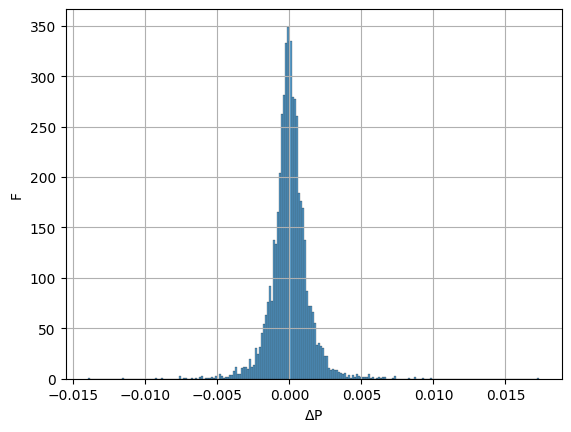

In [56]:
sns.histplot(Ndf.DiffPrice)
plt.grid()
plt.xlabel(r'$\Delta$P')
plt.ylabel('F')

- Determine la mejor distribucion estadística que se ajusta al histograma anterior, para ello puede emplear lo siguente:

(14613.527947910232,
 27360.991772190286,
 -0.20964563672636735,
 0.6022017125608812)

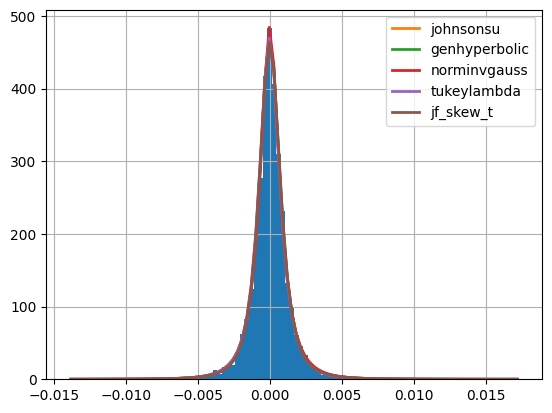

In [57]:
f = Fitter(Ndf.DiffPrice,
           distributions=get_distributions())
f.fit()
f.summary()
# Indentificamos la mejor distribucion con el error cuadratico medio
f.get_best(method = 'sumsquare_error')
# Indentificamos parametros de la distrubicion beta
f.fitted_param["beta"]

7. Para el data frame, seleccionemos solo los datos del 2023.



In [58]:
Ndf2023 = Ndf.loc['2023']
Ndf2023

,Close,DiffPrice
time,,
2023-01-02 00:00:00,1.06796,-0.00200
2023-01-02 01:00:00,1.06965,0.00169
2023-01-02 02:00:00,1.07058,0.00093
2023-01-02 03:00:00,1.06896,-0.00162
2023-01-02 04:00:00,1.06880,-0.00016
...,...,...
2023-05-12 19:00:00,1.08514,-0.00038
2023-05-12 20:00:00,1.08546,0.00032
2023-05-12 21:00:00,1.08531,-0.00015


8. El comando groupby permite agrupar los datos con la periodicidad deseada: 1 dias, 2 dias, 1 mes etc. Determina el promedio con una periodicidad de 15 dias, con periodidicidad de 1 semana, y una periodicidad de 1 mes

```python
  df.groupby(pd.Grouper(key='time', freq='15D')).mean()
```

In [59]:
Ndf202315D = Ndf2023.groupby(pd.Grouper(freq='15D'))
Ndf202315D.mean()

,Close,DiffPrice
time,,
2023-01-02,1.069361,0.000047
2023-01-17,1.085565,0.000015
2023-02-01,1.077679,-0.000066
2023-02-16,1.063150,-0.000034
2023-03-03,1.063186,0.000026
2023-03-18,1.080936,0.000074
2023-04-02,1.093090,0.000063
2023-04-17,1.099084,-0.000006
2023-05-02,1.098889,-0.000059


In [60]:
Ndf20231W = Ndf2023.groupby(pd.Grouper(freq='1W')) # 1 semana == 1W
Ndf20231W.mean()

,Close,DiffPrice
time,,
2023-01-08,1.059972,-0.000047
2023-01-15,1.076002,0.000156
2023-01-22,1.082041,0.000020
2023-01-29,1.088414,0.000010
2023-02-05,1.089281,-0.000062
2023-02-12,1.073363,-0.000097
2023-02-19,1.069648,0.000014
2023-02-26,1.063374,-0.000124
2023-03-05,1.060854,0.000073


In [61]:
Ndf20231M = Ndf2023.groupby(pd.Grouper(freq='1M')) # 1 mes == 1M
Ndf20231M.mean()

,Close,DiffPrice
time,,
2023-01-31,1.077463,0.000031
2023-02-28,1.071167,-0.000060
2023-03-31,1.070874,0.000049
2023-04-30,1.096051,0.000036
2023-05-31,1.098980,-0.000069


9. Para los datos asociados a los meses de 2023, construya un histograma para cada mes.  Para ello puedo emplear el metodo groupby. Notetese que si no  realiza una operación después de aplicar el metodo grouby, podrias iterar sobre dicho objeto, por ejemplo:

```python
q=df.groupby(pd.Grouper(key='time', freq='15D'))

for name, group in q:
  print(name, group)
```

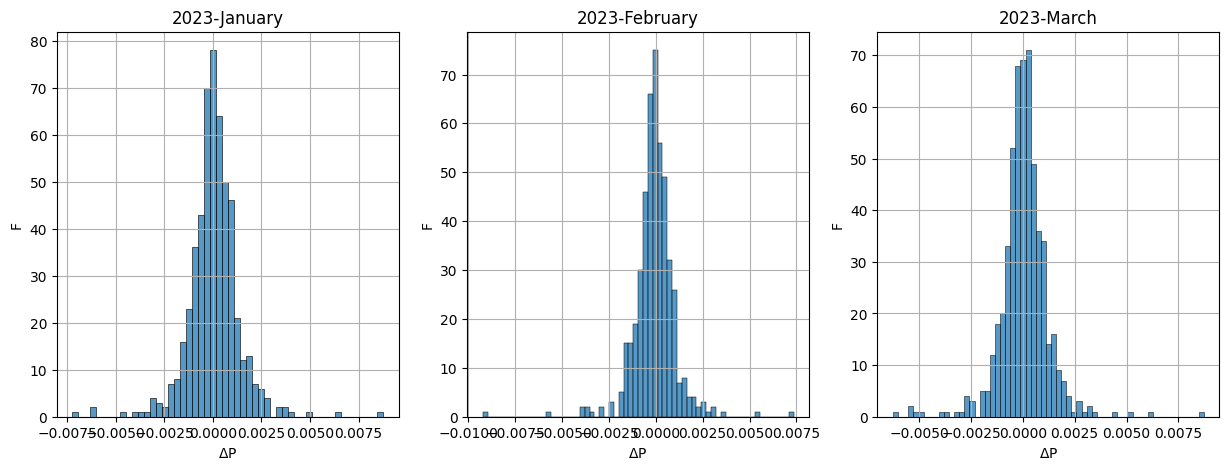

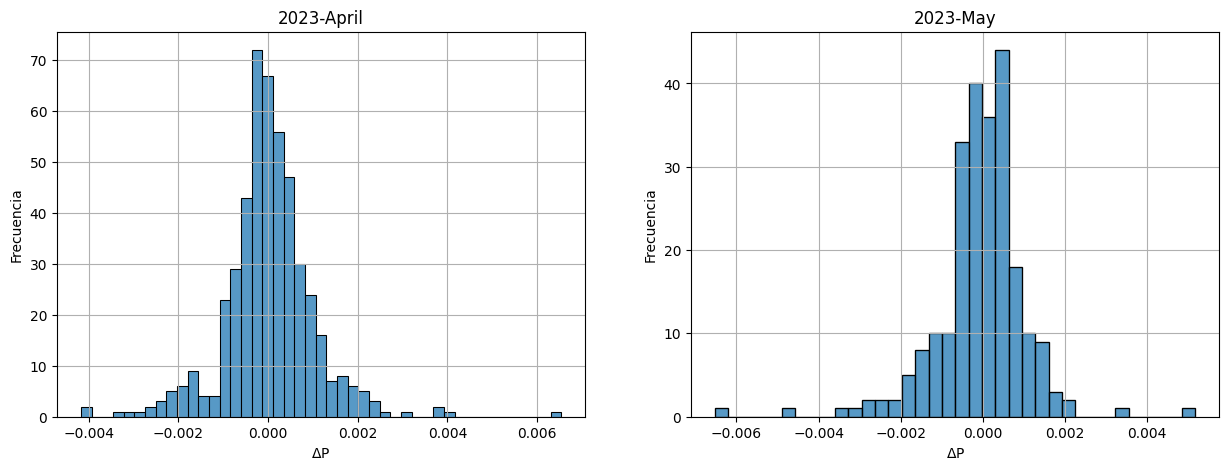

In [62]:
fig1, axs1 = plt.subplots(1, 3, figsize=(15, 5))
fig2, axs2 = plt.subplots(1, 2, figsize=(15, 5))

q = Ndf2023.groupby(pd.Grouper(freq='1M'))

flag1 = 0
flag2 = 0
for name, group in q:
  if int(name.strftime('%m')) <= len(axs1):
    sns.histplot(group.DiffPrice, ax=axs1[flag1])
    axs1[flag1].grid()
    axs1[flag1].set_title(name.strftime('%Y-%B'))
    axs1[flag1].set_xlabel(r'$\Delta$P')
    axs1[flag1].set_ylabel('F')
    flag1 += 1
  elif int(name.strftime('%m')) > len(axs1):
    sns.histplot(group.DiffPrice, ax=axs2[flag2])
    axs2[flag2].grid()
    axs2[flag2].set_title(name.strftime('%Y-%B'))
    axs2[flag2].set_xlabel(r'$\Delta$P')
    axs2[flag2].set_ylabel('Frecuencia')
    flag2 += 1


## Análisis de datos con pandas.

Para el siguiente [dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) realizar lo siguiente:


1. Leer los datos desde una página web.

2. Renombrar las columnas en formato PascalCase.

3. Utilizar los métodos `head()`, `tail()`, `describe()` e `info()` para obtener información sobre el `DataFrame`.

4. Contabilizar la cantidad de valores nulos (`null` o `NaN`) en el `DataFrame`.
   Si se encuentran valores nulos, ¿qué estrategia propondrías para reemplazarlos?

5. Identificar los valores únicos en la columna `target` que representan las etiquetas B y M (Benigno y Maligno, respectivamente).
   Utiliza el método `unique()` para mostrar estos valores.

6. Realizar un conteo de los casos etiquetados como B y M utilizando la librería `seaborn` y el método `countplot()`:

```python
import seaborn as sns
sns.countplot?
```

7. Agregar una nueva columna llamada `DiagnosisNumeric` donde se asigna el valor 0 a la etiqueta B (Benigno) y el valor 1 a la etiqueta M (Maligno).


8. Normalizar cada columna respecto a su media y desviación estándar utilizando la fórmula:  
   `(x - mean(x)) / std(x)`

9. Agrupar características similares y calcular su promedio.
   Para las siguientes características:

```python
['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean', 'SmoothnessMean', 'CompactnessMean', 'ConcavityMean', 'ConcavePointsMean', "SymmetryMean", "FractalDimensionMean"]
```

Usa expresiones regulares para identificar patrones comunes, como `radius1`, `radius2`,`radius3`, etc., y calcular los promedios. Por ejemplo:

```python
re.match(r'^[a-zA-Z_]+', "holamundo12341").group(0)
```

También puedes utilizar el método `startswith()` para buscar estos patrones en los nombres de las columnas.


10. Crear un gráfico donde se muestre el histograma de la columna `RadiusMean` separado por las etiquetas B y M, utilizando colores diferentes (naranja y azul, respectivamente) para cada diagnóstico.

11. Generar gráficos de violín para múltiples características.
   Para las columnas:

   - `RadiusMean`
   - `TextureMean`
   - `PerimeterMean`
   - `AreaMean`
   - `SmoothnessMean`
   - `CompactnessMean`
   - `ConcavityMean`
   - `ConcavePointsMean`
   - `Symmetry3`
   - `FractalDimension3`

   Realiza un gráfico múltiple tipo violín, como en el siguiente ejemplo:

```python
data = pd.melt(df.iloc[:, 0:10], id_vars="Diagnosis", var_name="features", value_name="value")
sns.violinplot(x="features", y="value", hue="Diagnosis", data=data, split=True, inner="quart")
plt.xticks(rotation=45)
```


12.  Determinar y eliminar los valores atípicos (`outliers`) en la columna `RadiusMean`.

Para identificarlos, construye un gráfico tipo `boxplot`:

```python
df.boxplot(column="RadiusMean", by='Diagnosis', sym='k.', figsize=(18,6))
```

Usa el rango intercuartílico (IQR) para definir los outliers. Los valores fuera del rango [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR] se consideran outliers. Ejemplo de cómo eliminar estos valores:

```python
Q1 = df['edad'].quantile(0.25)
Q3 = df['edad'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['edad'] < (Q1 - 1.5 * IQR)) | (df['edad'] > (Q3 + 1.5 * IQR)))]
```

Otra alternativa es utilizar el puntaje Z para detectar `outliers`:

```python
df = df[(np.abs(stats.zscore(df['edad'])) < 3)]
```



13. Encontrar la matrix de correlación, emplear el metodo corr(), dentro de seaborn buscar el metodo heatmap() para realizar un grafico de la matrix de correlación.

14. ¿Que otro tipo de gráficos pueden ser realizados para entender mejor los datos?



Hint:


```python
df['time'] =  pd.to_datetime(df.time)
df.set_index("time", inplace=True)
df = df.drop(columns = ["Unnamed: 0"])
df["DiffClose"] = df.close.diff()
df2 = df[["DiffClose", "close"]][1:]
df2.DiffClose.hist(bins=1000)


!pip install fitter


from fitter import Fitter, get_common_distributions, get_distributions

f = Fitter(df2.DiffClose,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()a
f.summary()
#Indentificamos la mejor distribucion con el error cuadratico medio
f.get_best(method = 'sumsquare_error')
#Indentificamos parametros de la distrubicion beta
f.fitted_param["beta"]




f = Fitter(df2.DiffClose,
           distributions=['gamma',
                          'genhyperbolic',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()
#Indentificamos la mejor distribucion con el error cuadratico medio
f.get_best(method = 'sumsquare_error')
#Indentificamos parametros de la distrubicion beta
f.fitted_param["beta"]



df2.groupby(pd.Grouper(freq='15D')).mean()
```

In [63]:
!pip install ucimlrepo

Si se lee la informacion como en la celda siguiente hay una separacion de informacion, pues el dataset X le falta las ID y ademas la informacion del dataset de y, el cual tiene el diagnostico que si es M:maligno o B:benigno, por eso decidi tomar la variable breast_cancer_wisconsin_diagnostic, esta tiene la informacion total, incluso tiene una url en la cual esta toda la informacion completa, esto sera entonces el dataframe de data, y trabajaremos con este.


1. Leer los datos desde una página web.



In [64]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# metadata
#print(breast_cancer_wisconsin_diagnostic.metadata)

# variable information
#print(breast_cancer_wisconsin_diagnostic.variables)


Informacion sacada de la pagina:

1) ID number

2) Diagnosis (M = malignant, B = benign)

3-32)

Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry
	j) fractal dimension ("coastline approximation" - 1)

In [65]:
data = pd.read_csv('https://archive.ics.uci.edu/static/public/17/data.csv')
data.head()

,ID,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


2. Renombrar las columnas en formato PascalCase.


In [66]:
data.columns = [i.title().replace('_', '') for i in data.columns]
print(f'Las columnas quedaron {data.columns}')

Las columnas quedaron Index(['Id', 'Radius1', 'Texture1', 'Perimeter1', 'Area1', 'Smoothness1',
       'Compactness1', 'Concavity1', 'ConcavePoints1', 'Symmetry1',
       'FractalDimension1', 'Radius2', 'Texture2', 'Perimeter2', 'Area2',
       'Smoothness2', 'Compactness2', 'Concavity2', 'ConcavePoints2',
       'Symmetry2', 'FractalDimension2', 'Radius3', 'Texture3', 'Perimeter3',
       'Area3', 'Smoothness3', 'Compactness3', 'Concavity3', 'ConcavePoints3',
       'Symmetry3', 'FractalDimension3', 'Diagnosis'],
      dtype='object')


3. Utilizar los métodos `head()`, `tail()`, `describe()` e `info()` para obtener información sobre el `DataFrame`.


In [67]:
data.head()

,Id,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,...,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3,Diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [68]:
data.tail()

,Id,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,...,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3,Diagnosis
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M
568,92751,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,B


In [69]:
data.describe()

,Id,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 569 non-null    int64  
 1   Radius1            569 non-null    float64
 2   Texture1           569 non-null    float64
 3   Perimeter1         569 non-null    float64
 4   Area1              569 non-null    float64
 5   Smoothness1        569 non-null    float64
 6   Compactness1       569 non-null    float64
 7   Concavity1         569 non-null    float64
 8   ConcavePoints1     569 non-null    float64
 9   Symmetry1          569 non-null    float64
 10  FractalDimension1  569 non-null    float64
 11  Radius2            569 non-null    float64
 12  Texture2           569 non-null    float64
 13  Perimeter2         569 non-null    float64
 14  Area2              569 non-null    float64
 15  Smoothness2        569 non-null    float64
 16  Compactness2       569 non

4. Contabilizar la cantidad de valores nulos (`null` o `NaN`) en el `DataFrame`.
   Si se encuentran valores nulos, ¿qué estrategia propondrías para reemplazarlos?



hay varias formas de saber cuantos valores nulos hay, este Dataframe nos trae la informacion que queremos saber de dos formas

a. Primera forma con:

breast_cancer_wisconsin_diagnostic.metadata['has_missing_values']

esto nos dice si hay o no hay valores faltantes en el dataframe

In [71]:
breast_cancer_wisconsin_diagnostic.metadata['has_missing_values']

'no'

b. Tambien hay un conteo propio el cual nos dice para cada columna si hay valores nulos, esot lo da en forma de un dataframe, con:

breast_cancer_wisconsin_diagnostic.variables

en la columna missing_values

In [72]:
breast_cancer_wisconsin_diagnostic.variables

,name,role,type,demographic,description,units,missing_values
0,ID,ID,Categorical,None,None,None,no
1,Diagnosis,Target,Categorical,None,None,None,no
2,radius1,Feature,Continuous,None,None,None,no
3,texture1,Feature,Continuous,None,None,None,no
4,perimeter1,Feature,Continuous,None,None,None,no
5,area1,Feature,Continuous,None,None,None,no
6,smoothness1,Feature,Continuous,None,None,None,no
7,compactness1,Feature,Continuous,None,None,None,no
8,concavity1,Feature,Continuous,None,None,None,no
9,concave_points1,Feature,Continuous,None,None,None,no


Ahora, imaginando que hay algun valor nulo, y queremos saber cuantos, podemos hacer lo siguiente:

In [73]:
data.isnull().sum()

,0
Id,0
Radius1,0
Texture1,0
Perimeter1,0
Area1,0
Smoothness1,0
Compactness1,0
Concavity1,0
ConcavePoints1,0
Symmetry1,0


Ya nos hemos dado cuenta que no hay valores Nan, pero si lo hubiese podriamos cambiar estos por valores de 0, o si la fila que tiene estos valores no nos interesa la podriamos eliminar, lo cual es dificil porque se podria perder informacion. Incluso podriamos cambiar esos valores con medias de este valor faltante, o mirar si se puede encontrar con teoria. Cada forma depende del dato y el tipo y el dataset que se tenga, por eso es dificil hacer una estrategia general

5. Identificar los valores únicos en la columna `target` que representan las etiquetas B y M (Benigno y Maligno, respectivamente).
   Utiliza el método `unique()` para mostrar estos valores.

No existe una columna target, pero en breast_cancer_wisconsin_diagnostic hay un diccionario llamado target con valores de un dataframe, este dataframe tiene una columna llamada Diagnosis, tomare esta columna como la que se desea hacer.

Esta tiene solo valores de M:Maligno o B:Benigno

In [74]:
data.Diagnosis.unique()

array(['M', 'B'], dtype=object)

6. Realizar un conteo de los casos etiquetados como B y M utilizando la librería `seaborn` y el método `countplot()`:

```python
import seaborn as sns
sns.countplot?
```



<Axes: xlabel='Diagnosis', ylabel='count'>

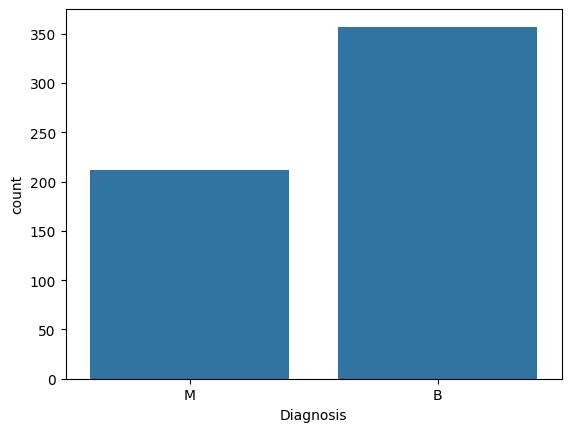

In [75]:
sns.countplot(x=data.Diagnosis)

7. Agregar una nueva columna llamada `DiagnosisNumeric` donde se asigna el valor 0 a la etiqueta B (Benigno) y el valor 1 a la etiqueta M (Maligno).




In [76]:
data['DiagnosisNumeric'] = data.Diagnosis.apply(lambda x: 0 if x == 'B' else 1)
data.DiagnosisNumeric

,DiagnosisNumeric
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


8. Normalizar cada columna respecto a su media y desviación estándar utilizando la fórmula:  
   `(x - mean(x)) / std(x)`

la columna diagnosis no tiene ni media y desviacion estandar por ser valores tipo str, por esto, la quitaremos en un nuevo dataframe, ademas de esto tambien quitaremos la columna Id, pues esta no nos da informacion.

In [77]:
dataWithoutDiagId = data.drop(columns=['Id', 'Diagnosis'])

for i in dataWithoutDiagId.columns:
  data[i] = dataWithoutDiagId[i].apply(lambda x: (x - dataWithoutDiagId[i].mean()) / dataWithoutDiagId[i].std())
data

,Id,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,...,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3,Diagnosis,DiagnosisNumeric
0,842302,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,...,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312,M,1.296535
1,842517,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,...,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943,M,1.296535
2,84300903,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,...,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214,M,1.296535
3,84348301,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,...,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672,M,1.296535
4,84358402,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,...,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751,M,1.296535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,2.109139,0.720838,2.058974,2.341795,1.040926,0.218868,1.945573,2.318924,-0.312314,...,1.751022,2.013529,0.378033,-0.273077,0.663928,1.627719,-1.358963,-0.708467,M,1.296535
565,926682,1.703356,2.083301,1.614511,1.722326,0.102368,-0.017817,0.692434,1.262558,-0.217473,...,1.420690,1.493644,-0.690623,-0.394473,0.236365,0.733182,-0.531387,-0.973122,M,1.296535
566,926954,0.701667,2.043775,0.672084,0.577445,-0.839745,-0.038646,0.046547,0.105684,-0.808406,...,0.578492,0.427529,-0.808876,0.350427,0.326479,0.413705,-1.103578,-0.318129,M,1.296535
567,927241,1.836725,2.334403,1.980781,1.733693,1.524426,3.269267,3.294046,2.656528,2.135315,...,2.301575,1.651717,1.429169,3.901415,3.194794,2.287972,1.917396,2.217684,M,1.296535


9. Agrupar características similares y calcular su promedio.
   Para las siguientes características:

```python
['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean', 'SmoothnessMean', 'CompactnessMean', 'ConcavityMean', 'ConcavePointsMean', "SymmetryMean", "FractalDimensionMean"]
```

Usa expresiones regulares para identificar patrones comunes, como `radius1`, `radius2`,`radius3`, etc., y calcular los promedios. Por ejemplo:

```python
re.match(r'^[a-zA-Z_]+', "holamundo12341").group(0)
```

También puedes utilizar el método `startswith()` para buscar estos patrones en los nombres de las columnas.

In [78]:
StartW = ['Radius', 'Texture', 'Perimeter', 'Area', 'Smoothness', 'Compactness', 'Concavity', 'ConcavePoints', "Symmetry", "FractalDimension"]
StartM = ['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean', 'SmoothnessMean', 'CompactnessMean', 'ConcavityMean', 'ConcavePointsMean', "SymmetryMean", "FractalDimensionMean"]

for j in range(len(StartW)):
  data[StartM[j]] = list(map(lambda x: np.mean(x), data.set_index([data.columns[i] for i in np.where(data.columns.str.startswith(StartW[j]) == True)[0]]).index.values))

Como se que esto en una sola linea es muy feo y complejo de entender, es claro que yo lo iba haciendo por partes y mientras lo hacia, pensaba que en una linea quedaria mucho mas limpio, por lo tanto explicare que hace cada parte del codigo

```
[data.columns[i] for i in np.where(data.columns.str.startswith('Radius') == True)[0]]
```

Esta parte del codigo lo que hace es buscarme en los nombres de las columnas que tengan un nombre parecido, con startswith, y con np.where me encuentra el indice, y ya con el indice de los titulos parecidos, puedo hacer una lista de los nombres de las columnas parecidas

Pdta: La parte de ('Radius') es un valor que se iterara atraves de la lista StartW, que tiene la parte inicial de cada columna parecida, por ultimo Se pone [0], pues es un index, y queremos el primer valor que es la lista que queremos.

```
data.set_index(['Radius1', 'Radius2', 'Radius3']).index.values
```
esta parte del codigo lo que hace es poner de nuevos indices las columnas que estan relacionadas, de esta forma puedo tomarlas a las 3 a la vez, y tomar sus valores para hacer la media con la funcion map, lambda y np.mean. Despues de esto agrego una nueva fila con los nombres que se proponen.

Pdta: la parte de ['Radius1', 'Radius2', 'Radius3'] es donde se iterara con el codigo que esta inmediatamente anterior.


se logran ver entonces las ultimas columnas, son las que acabamos de agregar.

In [79]:
data.columns

Index(['Id', 'Radius1', 'Texture1', 'Perimeter1', 'Area1', 'Smoothness1',
       'Compactness1', 'Concavity1', 'ConcavePoints1', 'Symmetry1',
       'FractalDimension1', 'Radius2', 'Texture2', 'Perimeter2', 'Area2',
       'Smoothness2', 'Compactness2', 'Concavity2', 'ConcavePoints2',
       'Symmetry2', 'FractalDimension2', 'Radius3', 'Texture3', 'Perimeter3',
       'Area3', 'Smoothness3', 'Compactness3', 'Concavity3', 'ConcavePoints3',
       'Symmetry3', 'FractalDimension3', 'Diagnosis', 'DiagnosisNumeric',
       'RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean',
       'SmoothnessMean', 'CompactnessMean', 'ConcavityMean',
       'ConcavePointsMean', 'SymmetryMean', 'FractalDimensionMean'],
      dtype='object')

10. Crear un gráfico donde se muestre el histograma de la columna `RadiusMean` separado por las etiquetas B y M, utilizando colores diferentes (naranja y azul, respectivamente) para cada diagnóstico.

<Axes: xlabel='RadiusMean', ylabel='Count'>

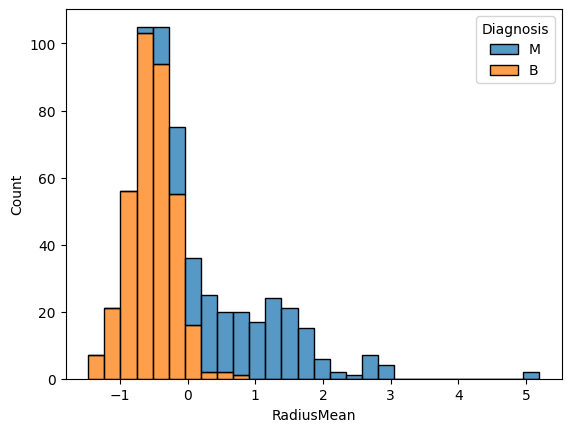

In [80]:
sns.histplot(data = data, x = 'RadiusMean', hue = 'Diagnosis', multiple = 'stack')

11. Generar gráficos de violín para múltiples características.
   Para las columnas:

   - `RadiusMean`
   - `TextureMean`
   - `PerimeterMean`
   - `AreaMean`
   - `SmoothnessMean`
   - `CompactnessMean`
   - `ConcavityMean`
   - `ConcavePointsMean`
   - `Symmetry3`
   - `FractalDimension3`

   Realiza un gráfico múltiple tipo violín, como en el siguiente ejemplo:

```python
data = pd.melt(df.iloc[:, 0:10], id_vars="Diagnosis", var_name="features", value_name="value")
sns.violinplot(x="features", y="value", hue="Diagnosis", data=data, split=True, inner="quart")
plt.xticks(rotation=45)
```




In [81]:
violin = data[data.columns[29:-2]].drop("DiagnosisNumeric", axis=1)
violin.head()

,Symmetry3,FractalDimension3,Diagnosis,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean
0,2.748204,1.935312,M,1.822892,-1.331460,2.133644,1.822793,0.886604,2.403566,1.827201,1.828182
1,-0.243675,0.280943,M,1.377122,-0.532558,1.160448,1.512536,-0.602112,-0.536342,-0.203612,0.631241
2,1.151242,0.201214,M,1.438879,-0.115855,1.253866,1.397605,0.390527,0.982746,0.809797,1.804099
3,6.040726,4.930672,M,-0.241121,0.092354,-0.185181,-0.533818,2.453684,3.343920,1.573617,1.579444
4,-0.867590,-0.396751,M,1.438539,-1.135278,1.461481,1.411195,0.660750,0.059090,0.936729,1.099685


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Symmetry3'),
  Text(1, 0, 'FractalDimension3'),
  Text(2, 0, 'RadiusMean'),
  Text(3, 0, 'TextureMean'),
  Text(4, 0, 'PerimeterMean'),
  Text(5, 0, 'AreaMean'),
  Text(6, 0, 'SmoothnessMean'),
  Text(7, 0, 'CompactnessMean'),
  Text(8, 0, 'ConcavityMean'),
  Text(9, 0, 'ConcavePointsMean')])

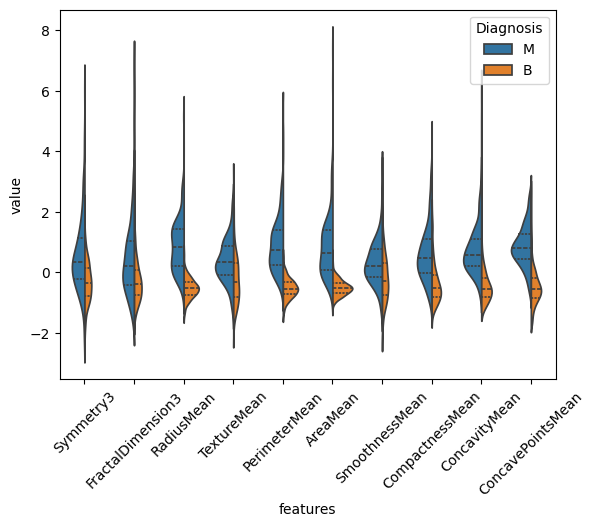

In [82]:
valores = pd.melt(violin, id_vars="Diagnosis", var_name="features", value_name = "value")
sns.violinplot(x="features", y="value", hue="Diagnosis", data=valores, split=True, inner="quart")
plt.xticks(rotation=45)

12.  Determinar y eliminar los valores atípicos (`outliers`) en la columna `RadiusMean`.

Para identificarlos, construye un gráfico tipo `boxplot`:

```python
df.boxplot(column="RadiusMean", by='Diagnosis', sym='k.', figsize=(18,6))
```

Usa el rango intercuartílico (IQR) para definir los outliers. Los valores fuera del rango [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR] se consideran outliers. Ejemplo de cómo eliminar estos valores:

```python
Q1 = df['edad'].quantile(0.25)
Q3 = df['edad'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['edad'] < (Q1 - 1.5 * IQR)) | (df['edad'] > (Q3 + 1.5 * IQR)))]
```

Otra alternativa es utilizar el puntaje Z para detectar `outliers`:

```python
df = df[(np.abs(stats.zscore(df['edad'])) < 3)]
```





<Axes: title={'center': 'RadiusMean'}, xlabel='Diagnosis'>

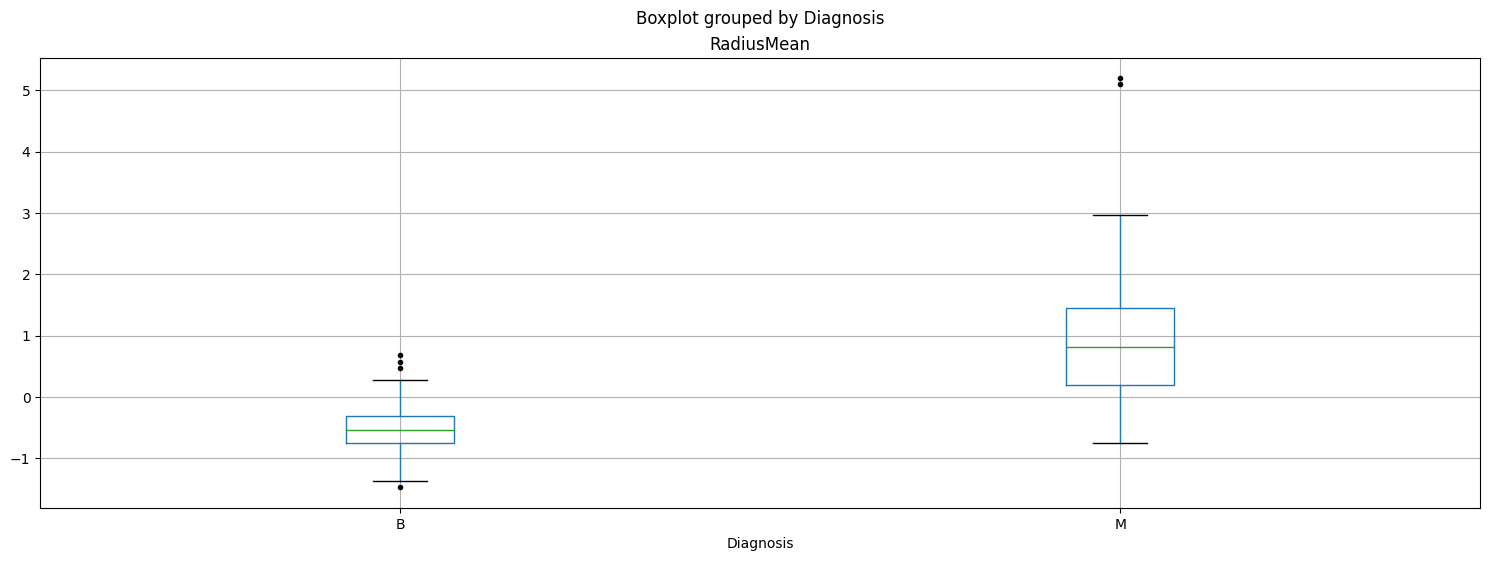

In [83]:
data.boxplot(column = "RadiusMean", by = 'Diagnosis', sym = 'k.', figsize = (18,6))

In [84]:
Q1 = data['RadiusMean'].quantile(0.25)
Q3 = data['RadiusMean'].quantile(0.75)
IQR = Q3 - Q1
data = data[~((data['RadiusMean'] < (Q1 - 1.5 * IQR)) | (data['RadiusMean'] > (Q3 + 1.5 * IQR)))]

13. Encontrar la matrix de correlación, emplear el metodo corr(), dentro de seaborn buscar el metodo heatmap() para realizar un grafico de la matrix de correlación.


Matrix de correlacion sin tener en cuenta las columnas Id y Diagnosis

In [85]:
dataWithoutDiagId.corr()

,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3,DiagnosisNumeric
Radius1,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,0.730029
Texture1,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,0.415185
Perimeter1,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,0.742636
Area1,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,0.708984
Smoothness1,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,0.358560
Compactness1,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,0.596534
Concavity1,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,0.696360
ConcavePoints1,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,0.776614
Symmetry1,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,0.330499
FractalDimension1,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,-0.012838


<Axes: >

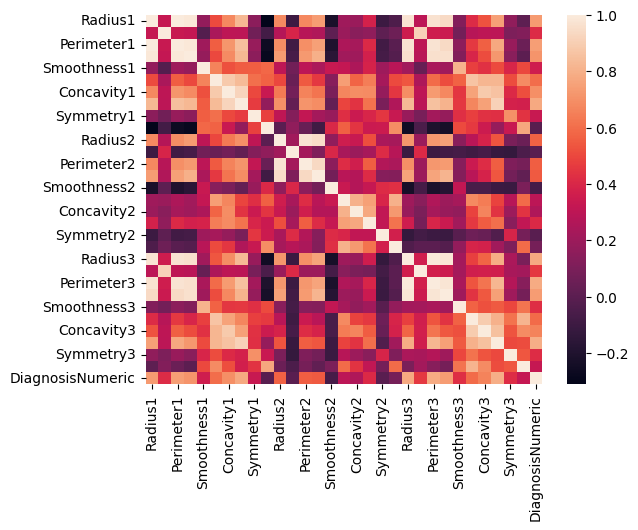

In [86]:
sns.heatmap(dataWithoutDiagId.corr())

14. ¿Que otro tipo de gráficos pueden ser realizados para entender mejor los datos?

Como cada fila es de una persona distinta, es decir como si fuera un experimento distinto, este no depende de los demas experimentos, por esta razon algo que no se veria bien hacer lo es un .diff .

Parece ser que el perimetro sigue una gaussiana con cola hacia la derecha, lo cual tiene sentido ya que las masas suelen tener tamaños grandes, y vemos como los mas grandes son Malignos, de la mmisma forma que se vio antes con el radio

<Axes: xlabel='PerimeterMean', ylabel='Count'>

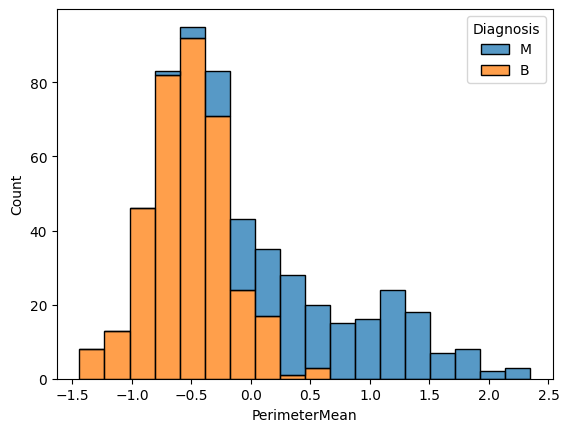

In [87]:
sns.histplot(data = data, x = 'PerimeterMean', hue = 'Diagnosis', multiple = 'stack')

Parece haber una correlacion entre ConcavityMean y Compactnees

<Axes: xlabel='ConcavityMean', ylabel='CompactnessMean'>

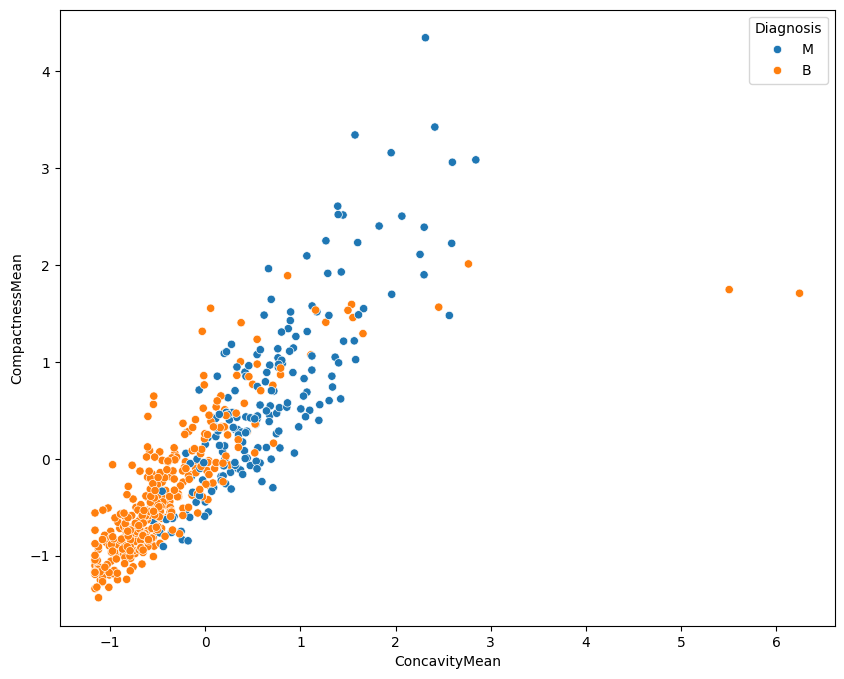

In [88]:
plt.figure(figsize=(10,8))
sns.scatterplot(x = 'ConcavityMean', y = 'CompactnessMean', data = data, hue = 'Diagnosis')

si se tuviera la masa de este incluso se podria hacer un razonamiento entre la densidad y si es Maligno o Benigno, asumiendo cosas como que podria ser una esfera perfecta claro esta.